## PCA Implementation on Class of Images

<Figure size 1000x600 with 0 Axes>

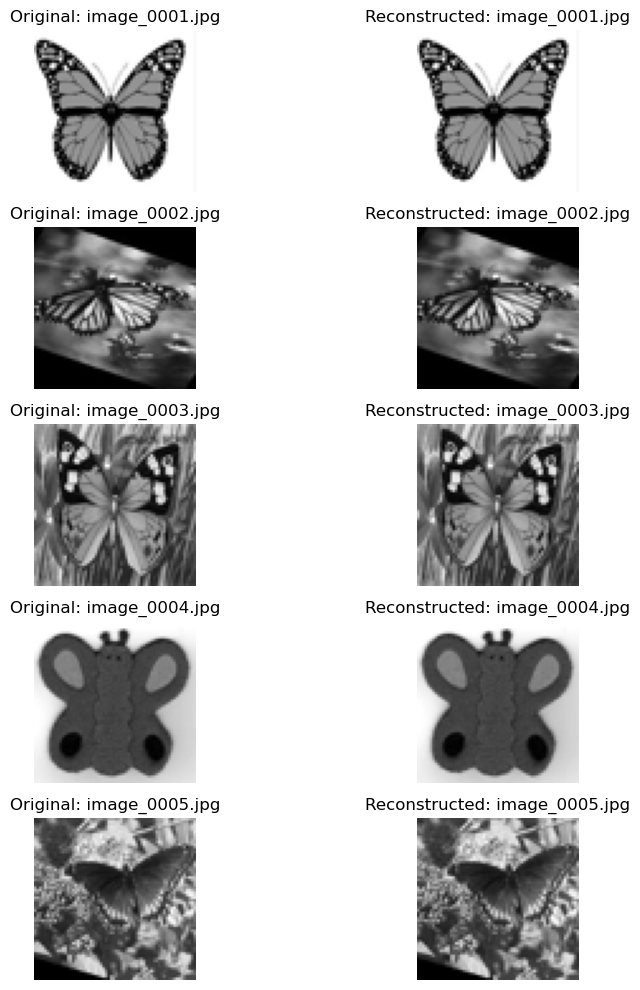

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image
import os

# Function to load and preprocess images
def load_images(image_folder, image_size=(64, 64)):
    image_data = []
    filenames = os.listdir(image_folder)
    
    for filename in filenames:
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = img.resize(image_size)  # Resize image to standard size
        img_array = np.array(img).flatten()  # Flatten the image into a 1D array
        image_data.append(img_array)
    
    return np.array(image_data), filenames

# Function to find optimal n_components based on explained variance
def find_optimal_n_components(image_data, explained_variance_threshold=0.95):
    n_samples, n_features = image_data.shape
    max_components = min(n_samples, n_features)  # Maximum possible components
    
    pca = PCA()
    pca.fit(image_data)
    
    # Cumulative variance explained
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    
    # Find the number of components that explain the desired variance
    n_components = np.argmax(cumulative_variance >= explained_variance_threshold) + 1
    n_components = min(n_components, max_components)  # Ensure it's within bounds
    
    print(f"Optimal n_components to retain {explained_variance_threshold*100}% variance: {n_components}")
    
    return n_components


# PCA-based Image Compression
def pca_image_compression(image_data, n_components):
    # Perform PCA
    pca = PCA(n_components=n_components)
    compressed_data = pca.fit_transform(image_data)  # Compress the data
    
    # Reconstruct the images
    reconstructed_data = pca.inverse_transform(compressed_data)
    
    return reconstructed_data, pca

# Function to display original and reconstructed images side by side
def display_images(original, reconstructed, filenames, n_images=5):
    fig, axes = plt.subplots(n_images, 2, figsize=(10, 10))
    
    for i in range(n_images):
        original_image = original[i].reshape(64, 64)
        reconstructed_image = reconstructed[i].reshape(64, 64)
        
        # Plot original image
        axes[i, 0].imshow(original_image, cmap='gray')
        axes[i, 0].set_title(f"Original: {filenames[i]}")
        axes[i, 0].axis('off')
        
        # Plot reconstructed image
        axes[i, 1].imshow(reconstructed_image, cmap='gray')
        axes[i, 1].set_title(f"Reconstructed: {filenames[i]}")
        axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Main function to run PCA-based image compression and error plot per image for multiple n_components
def main(image_folder, explained_variance_threshold=0.95, n_components_list=[10, 25, 50, 80]):
    # Load and preprocess images
    image_data, filenames = load_images(image_folder)
    
    # Create a single plot for all MSE graphs
    plt.figure(figsize=(10, 6))

    #Optionally, display original and reconstructed images for the best n_components
    optimal_n_components = n_components_list[-1]  # Choose the last n_components from the list for display
    reconstructed_data, pca = pca_image_compression(image_data, optimal_n_components)
    display_images(image_data, reconstructed_data, filenames)

# Set the folder containing your images
image_folder = r"C:\Users\kalvi\OneDrive - Indian Institute of Technology Bombay\Sem 5\CS 663\project\jupyter\butterfly"

# Run the PCA-based compression and plot MSE per image for different n_components values
main(image_folder, explained_variance_threshold=0.95, n_components_list=[10, 25, 50, 90])
